In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sns.set(context="notebook", style="darkgrid", palette="dark")
np.set_printoptions(suppress=True)

In [ ]:
# Tools 

def graph_formatting(plot,x_tile, y_title, title=1, legend=1):
  plt = plot
  plt.xlabel(x_tile)
  plt.ylabel(y_title)
  if title != 1:
    plt.title(title)
  if legend != 1:
    plt.legend(title = legend)

  plt.show()

def graph_formatting_subplot(plot,x_tile, y_title, title=1, legend=1):
  plt = plot
  plt.set_xlabel(x_tile)
  plt.set_ylabel(y_title)
  if title != 1:
    plt.title(title)
  if legend != 1:
    plt.legend(title = legend)


# Gradient descent algorithm implementation

## 1. Model

In [ ]:
def model(X, theta):
    return X.dot(theta)

## 2. Cost function

In [ ]:
def cost_function(X, y, theta):
    n = len(y)
    return 1/n * np.sum((model(X, theta) - y)**2)

## 3. Gradient

In [ ]:
def grad(X, y, theta):
    n = len(y)
    return 2/n * X.T.dot(model(X, theta) - y)

## 4. Gradient descent

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    theta_dif = []
    
    for i in range(0, n_iterations):
        theta_temp = theta
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_dif.append(theta_temp - theta)

    theta_dif = np.array(theta_dif) 
        
    return theta, cost_history, theta_dif

## 5. R-square

In [ ]:
def r_square(X, y, theta):
    n = len(y)
    return 1 - (np.sum((y - model(X, theta))**2) / (n*np.var(y)))

# Dataset 1 : Energy

### Import data

In [ ]:
df1 = pd.read_csv('dataEnergy.csv')
df1

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


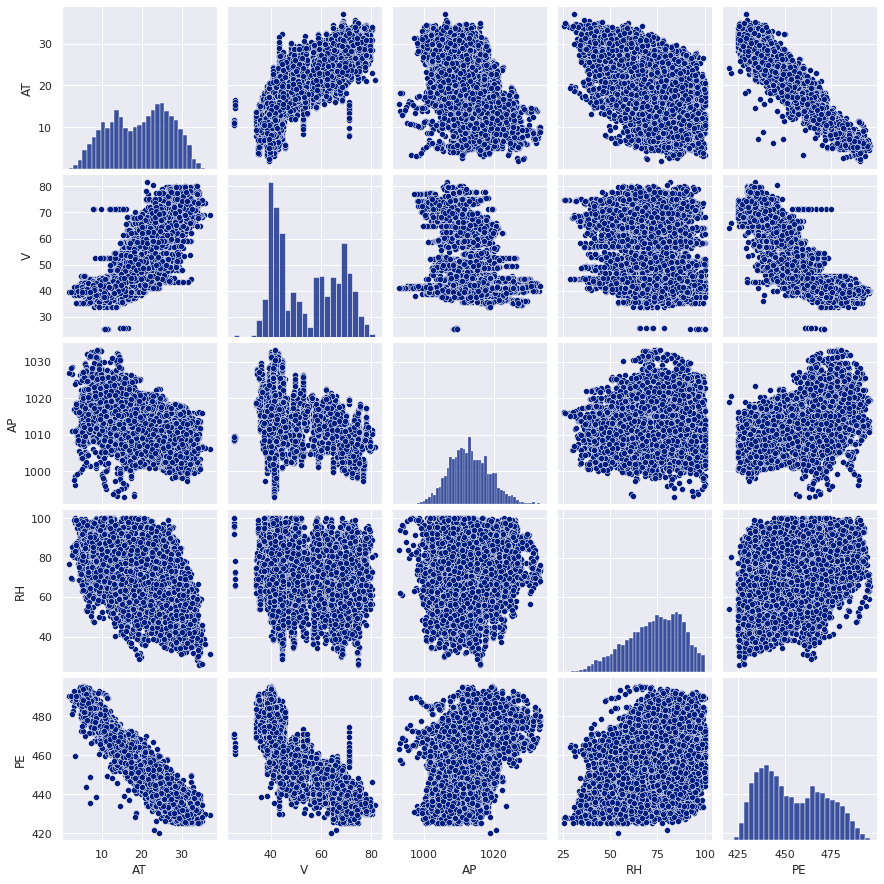

In [ ]:
sns.pairplot(df1, height=2.5)

### Data processing

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df1, test_size=0.2, random_state=1)

In [ ]:
# Init the array of regressors 
x_train = training_data[['AT', 'V','AP', 'RH']].to_numpy()
x_test = testing_data[['AT', 'V','AP', 'RH']].to_numpy()

# Init the array of responses
y_train = training_data[['PE']].to_numpy()
y_test = testing_data[['PE']].to_numpy()

# Standardization of x
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled_train = scaler.transform(x_train)

scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = scaler.transform(x_test)

# Init the array X of size n x (r+1) 
X_train = np.hstack((x_scaled_train, np.ones((x_scaled_train.shape[0],1))))
X_test = np.hstack((x_scaled_test, np.ones((x_scaled_test.shape[0],1))))

# Normalization of x
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_test)

# Init the array X of size n x (r+1) 
X_train_minmax = np.hstack((X_train_minmax, np.ones((X_train_minmax.shape[0],1))))

# Init the array theta of (r+1) x 1
theta = np.zeros((X_train.shape[1],1))
#theta = np.random.randn(X.shape[1],1)

### Computation of the gradient descent

In [ ]:
learning_rate = 0.1
n_iterations = 1000

theta_final, cost_history, theta_dif = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
theta_final

array([[-14.62735481],
       [ -3.03172   ],
       [  0.34090246],
       [ -2.31811159],
       [454.36097335]])

### Convergence display

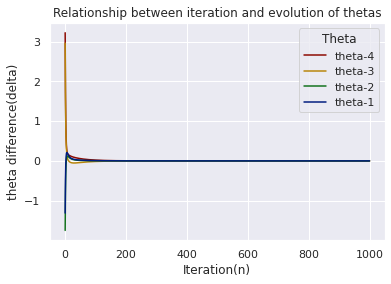

In [ ]:
plt.plot(range(n_iterations),theta_dif[:,0], c='r', label = "theta-4")
plt.plot(range(n_iterations),theta_dif[:,1], c='y', label = "theta-3")
plt.plot(range(n_iterations),theta_dif[:,2], c='g', label = "theta-2")
plt.plot(range(n_iterations),theta_dif[:,3], c='b', label = "theta-1")
#plt.plot(range(n_iterations),theta_dif[:,4], c='purple', label = "theta-0"))

graph_formatting(plt,'Iteration(n)', 'theta difference(delta)', 'Relationship between iteration and evolution of thetas', 'Theta')

Lower cost function value :  20.88150111295075


Text(0, 0.5, 'cost')

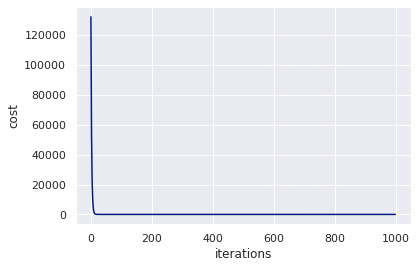

In [ ]:
plt.plot(range(n_iterations),cost_history)
print("Lower cost function value : ", cost_history[-1])

plt.xlabel('iterations')
plt.ylabel('cost')

### Results

In [ ]:
r_square(X_test, y_test, theta_final)

0.9318418090164474

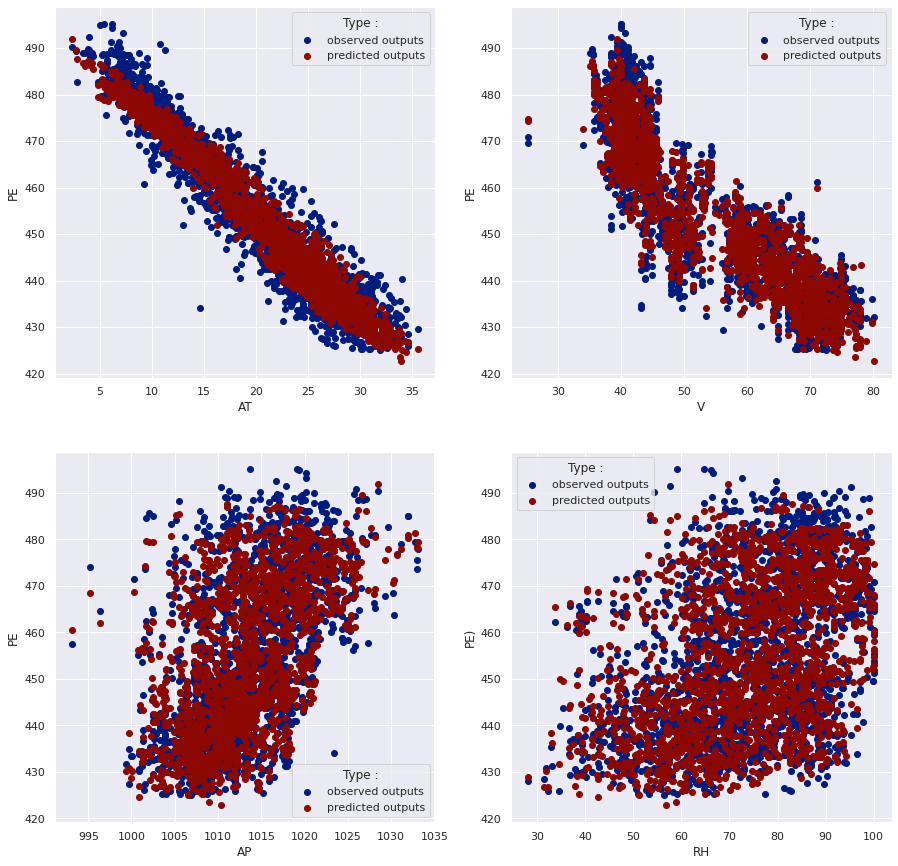

In [ ]:
predictions = model(X_test, theta_final)

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,15))

ax1[0].scatter(x_test[:,0],y_test, label = "observed outputs")
ax1[0].scatter(x_test[:,0], predictions, c='r', label = "predicted outputs")

ax1[1].scatter(x_test[:,1],y_test, label = "observed outputs")
ax1[1].scatter(x_test[:,1], predictions, c='r', label = "predicted outputs")

ax2[0].scatter(x_test[:,2],y_test, label = "observed outputs")
ax2[0].scatter(x_test[:,2], predictions, c='r', label = "predicted outputs")

ax2[1].scatter(x_test[:,3],y_test, label = "observed outputs")
ax2[1].scatter(x_test[:,3], predictions, c='r', label = "predicted outputs")

graph_formatting_subplot(ax1[0],'AT', 'PE', 1, 'Type :')
graph_formatting_subplot(ax1[1],'V', 'PE', 1, 'Type :')
graph_formatting_subplot(ax2[0],'AP', 'PE', 1, 'Type :')
graph_formatting_subplot(ax2[1],'RH', 'PE)', 1, 'Type :')

In [ ]:
from tabulate import tabulate

def print_rsquare_table(slr, elr, iters):
  header = []
  table = []

  while(slr >= elr):
      learning_rate = slr
      header.append(learning_rate)
      slr = slr/10

  for lr in header:
    sub_table = [lr]

    for n in iters:
      theta_final, cost_history, theta_dif = gradient_descent(X_train, y_train, theta, lr, n)
      r_square_1 = r_square(X_test, y_test, theta_final)*100
      if r_square_1 < 0 :
        r_square_1 = 0
      sub_table.append(round(r_square_1,4))
    
    table.append(sub_table)

  print(print(tabulate(table, iterations, tablefmt="github")))

In [ ]:
iterations = [10,50,100,1000,10000]

print_rsquare_table(0.1, 0.0001, iterations)

|        |   10 |      50 |     100 |    1000 |   10000 |
|--------|------|---------|---------|---------|---------|
| 0.1    |    0 | 92.6289 | 93.0853 | 93.1842 | 93.1842 |
| 0.01   |    0 |  0      |  0      | 93.0823 | 93.1842 |
| 0.001  |    0 |  0      |  0      |  0      | 93.082  |
| 0.0001 |    0 |  0      |  0      |  0      |  0      |
None


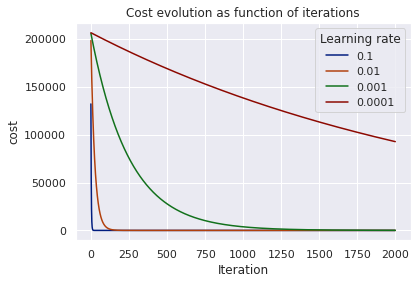

<Figure size 720x720 with 0 Axes>

In [ ]:
def print_conv_lr(slr, elr, iter):
  lr_array = []

  while(slr >= elr):
      learning_rate = slr
      lr_array.append(learning_rate)
      slr = slr/10

  for lr in lr_array:

    theta_final, cost_history, theta_dif = gradient_descent(X_train, y_train, theta, lr, iter)
    plt.plot(range(iter),cost_history, label=lr)
  
  graph_formatting(plt,'Iteration', 'cost', 'Cost evolution as function of iterations', 'Learning rate')
  plt.figure(figsize=(10, 10))
  plt.show()
    
    
print_conv_lr(0.1,0.0001,2000)

### Validation with sklearn 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.coef_


array([[-1.96873903, -0.23853113,  0.0569771 , -0.15933303]])

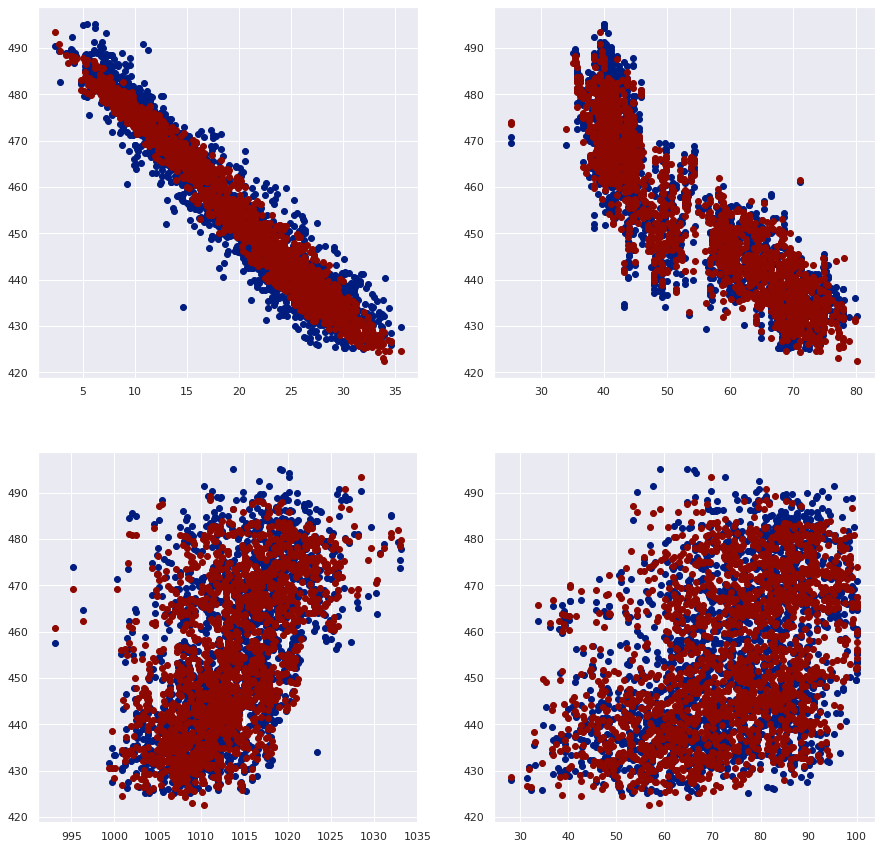

In [ ]:
predictionsSklearn = reg.predict(x_test)

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,15))

ax1[0].scatter(x_test[:,0],y_test)
ax1[0].scatter(x_test[:,0], predictionsSklearn, c='r', label="predicted outputs")

ax1[1].scatter(x_test[:,1],y_test)
ax1[1].scatter(x_test[:,1], predictionsSklearn, c='r')

ax2[0].scatter(x_test[:,2],y_test)
ax2[0].scatter(x_test[:,2], predictionsSklearn, c='r')

ax2[1].scatter(x_test[:,3],y_test)
ax2[1].scatter(x_test[:,3], predictionsSklearn, c='r')

In [ ]:
cost = mean_squared_error(y_test, predictionsSklearn)
cost

20.32999564968946

In [ ]:
r_squarre = r2_score(y_test, predictionsSklearn)
r_squarre


0.9321859923812417

***

# Dataset 2 : Interest rate

### Import data

In [ ]:
df2 = pd.read_csv('dataLoans.csv', usecols=['Interest.Rate','FICO.Score', 'Loan.Amount'])
df2

,Interest.Rate,FICO.Score,Loan.Amount
0,6,15.31,4891.67
1,11,19.72,3575.00
2,12,14.27,4250.00
3,13,21.67,14166.67
4,21,21.98,6666.67
...,...,...,...
2495,2472,7.90,5166.67
2496,2481,6.03,5000.00
2497,2482,6.62,9250.00
2498,2486,10.75,7083.33


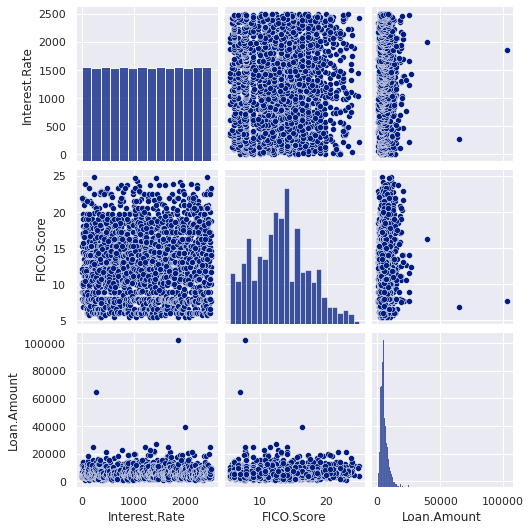

In [ ]:
sns.pairplot(df2, height=2.5)

### Modification of the dataset

In [ ]:
df2 = df2[df2['Loan.Amount'] < 15000]

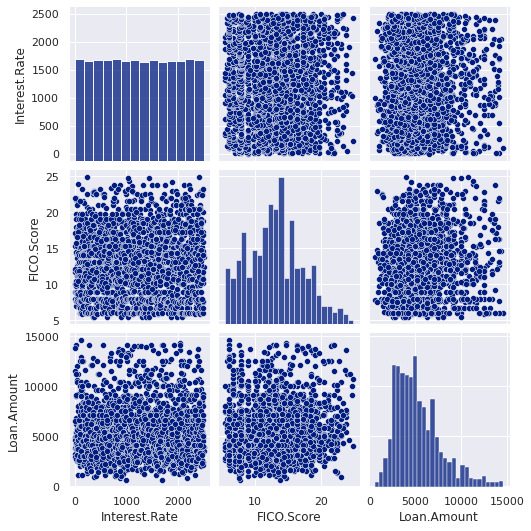

In [ ]:
sns.pairplot(df2, height=2.5)

### Data processing

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df2, test_size=0.2, random_state=1)

In [ ]:
# Init the array of regressors 
x_train = training_data[['FICO.Score', 'Loan.Amount']].to_numpy()
x_test = testing_data[['FICO.Score', 'Loan.Amount']].to_numpy()

# Init the array of responses
y_train = training_data[['Interest.Rate']].to_numpy()
y_test = testing_data[['Interest.Rate']].to_numpy()

# Standardization of x
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled_train = scaler.transform(x_train)

scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = scaler.transform(x_test)

# Init the array X of size n x (r+1) 
X_train = np.hstack((x_scaled_train, np.ones((x_scaled_train.shape[0],1))))
X_test = np.hstack((x_scaled_test, np.ones((x_scaled_test.shape[0],1))))

# Normalization of x
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_test)

# Init the array X of size n x (r+1) 
X_train_minmax = np.hstack((X_train_minmax, np.ones((X_train_minmax.shape[0],1))))

# Init the array theta of (r+1) x 1
theta = np.zeros((X.shape[1],1))
#theta = np.random.randn(X.shape[1],1)

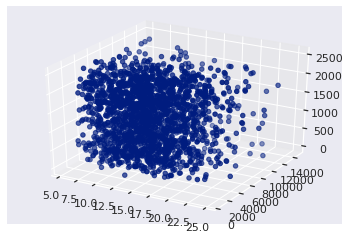

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], y_train);

### Computation of the gradient descent

In [ ]:
learning_rate = 0.01
n_iterations = 1000

theta_final, cost_history, theta_dif = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
theta_final

array([[   7.74454693],
       [   9.09889607],
       [1241.50255154]])

### Convergence display

Lower cost function value :  521628.54890765


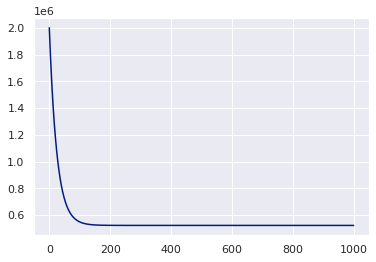

In [ ]:
plt.plot(range(n_iterations),cost_history)
print("Lower cost function value : ", cost_history[-1])

### Results

In [ ]:
r_square(X_test, y_test, theta_final)

-0.0018221266563769323

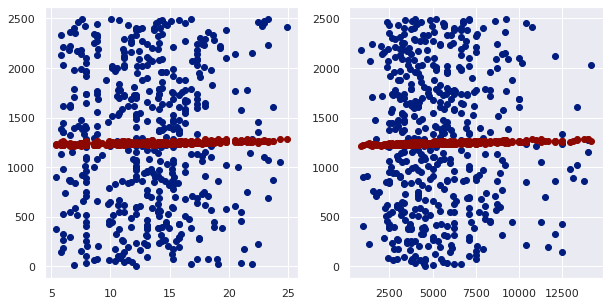

In [ ]:
predictions = model(X_test, theta_final)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(x_test[:,0],y_test)
ax1.scatter(x_test[:,0], predictions, c='r')

ax2.scatter(x_test[:,1],y_test)
ax2.scatter(x_test[:,1], predictions, c='r')

### Validation with sklearn

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.coef_

array([[1.86514999, 0.00351237]])

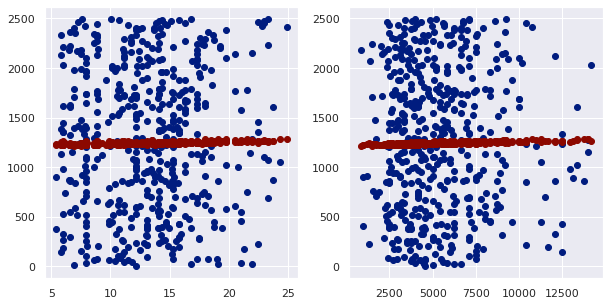

In [ ]:
predictionsSklearn = reg.predict(x_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(x_test[:,0],y_test)
ax1.scatter(x_test[:,0], predictionsSklearn, c='r')

ax2.scatter(x_test[:,1],y_test)
ax2.scatter(x_test[:,1], predictionsSklearn, c='r')

In [ ]:
cost = mean_squared_error(y_test, predictionsSklearn)
cost

524241.8532108719

In [ ]:
r_squarre = r2_score(y_test, predictionsSklearn)
r_squarre

-0.0017680017329579911